## Yolo aproach on MiTec dataset

In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split, ConcatDataset
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from torch import nn
from torch.optim import Adam
from torchvision.transforms import  Compose, ToTensor, Resize, RandomHorizontalFlip, RandomRotation, ColorJitter, RandomResizedCrop, Lambda
from PIL import Image
import matplotlib.pyplot as plt
from torchsummary import summary
import torchmetrics
from lightning.pytorch.loggers import WandbLogger
import wandb
import random
from datetime import datetime
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
%matplotlib inline 

In [3]:
import os

# Model
%env CUDA_VISIBLE_DEVICES=2
#%env PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:32

# HF Cache
os.environ["HF_HOME"] = "../.cache"
!echo $HF_HOME
!huggingface-cli whoami

%matplotlib inline 


env: CUDA_VISIBLE_DEVICES=2
../.cache
Not logged in


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


20
New https://pypi.org/project/ultralytics/8.3.119 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.107 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA TITAN Xp, 12183MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/data22/stu236894/GitRepos/TinyML-MT/Dataset/coco11.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=400, save=True, save_period=1, cache=False, device=None, workers=8, project=runs/train, name=yolo11n-exp115, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


TensorBoard: Start with 'tensorboard --logdir runs/train/yolo11n-exp115', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
WARNING ⚠️ imgsz=[400] must be multiple of max stride 32, updating to [416]


train: Scanning /data22/stu236894/GitRepos/TinyML-MT/Dataset/labels/train.cache... 11380 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11380/11380 [00:00<?, ?it/s]
val: Scanning /data22/stu236894/GitRepos/TinyML-MT/Dataset/labels/val.cache... 6600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6600/6600 [00:00<?, ?it/s]


Plotting labels to runs/train/yolo11n-exp115/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000156, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/train/yolo11n-exp115
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.34G       0.89      4.356      1.117         31        416: 100%|██████████| 712/712 [01:49<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:34<00:00,  6.08it/s]


                   all       6600      38422      0.223      0.259      0.184      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.38G     0.8664      2.691       1.12         82        416: 100%|██████████| 712/712 [01:42<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:35<00:00,  5.79it/s]


                   all       6600      38422       0.54       0.56      0.543      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.38G     0.7795      1.798      1.077         62        416: 100%|██████████| 712/712 [01:38<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:35<00:00,  5.83it/s]


                   all       6600      38422      0.746      0.687      0.739      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.38G     0.7261      1.398      1.042         41        416: 100%|██████████| 712/712 [01:38<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:34<00:00,  5.92it/s]


                   all       6600      38422      0.803      0.738      0.805        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.38G     0.6887      1.204      1.024         36        416: 100%|██████████| 712/712 [01:37<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:33<00:00,  6.11it/s]


                   all       6600      38422      0.843      0.767       0.84      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.38G     0.6666      1.092      1.013         47        416: 100%|██████████| 712/712 [01:39<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:34<00:00,  6.02it/s]


                   all       6600      38422      0.849      0.777      0.853      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.38G      0.649      1.015      1.005         16        416: 100%|██████████| 712/712 [01:39<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:35<00:00,  5.81it/s]


                   all       6600      38422      0.862      0.795      0.867      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.38G     0.6323     0.9596     0.9971         33        416: 100%|██████████| 712/712 [01:39<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:34<00:00,  5.96it/s]


                   all       6600      38422      0.879      0.796      0.873      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.38G     0.6224     0.9142     0.9932         51        416: 100%|██████████| 712/712 [01:38<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:33<00:00,  6.22it/s]


                   all       6600      38422      0.879      0.807      0.877      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.38G     0.6139     0.8814     0.9859         38        416: 100%|██████████| 712/712 [01:37<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:33<00:00,  6.17it/s]


                   all       6600      38422       0.89      0.814      0.885      0.789
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.38G      0.507     0.7556     0.9388         10        416: 100%|██████████| 712/712 [01:35<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:33<00:00,  6.11it/s]


                   all       6600      38422      0.883       0.81       0.88      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.38G     0.4968     0.7095     0.9295         17        416: 100%|██████████| 712/712 [01:36<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:32<00:00,  6.35it/s]


                   all       6600      38422      0.888      0.813      0.884      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.38G     0.4863     0.6861     0.9249         41        416: 100%|██████████| 712/712 [01:34<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:32<00:00,  6.42it/s]


                   all       6600      38422      0.894       0.81      0.887      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.38G     0.4812     0.6688     0.9216          9        416: 100%|██████████| 712/712 [01:34<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:32<00:00,  6.37it/s]


                   all       6600      38422        0.9      0.817      0.892      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.38G     0.4737     0.6532     0.9177         28        416: 100%|██████████| 712/712 [01:34<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:32<00:00,  6.37it/s]


                   all       6600      38422      0.899      0.821      0.895      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.38G     0.4673      0.633      0.913         12        416: 100%|██████████| 712/712 [01:34<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:32<00:00,  6.40it/s]


                   all       6600      38422        0.9      0.819      0.892      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.38G     0.4597     0.6191     0.9109         23        416: 100%|██████████| 712/712 [01:35<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:32<00:00,  6.45it/s]


                   all       6600      38422      0.904      0.823      0.896      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.38G     0.4565     0.6089     0.9097         30        416: 100%|██████████| 712/712 [01:34<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:32<00:00,  6.36it/s]


                   all       6600      38422      0.905      0.824      0.897      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.38G     0.4495     0.5967     0.9054         35        416: 100%|██████████| 712/712 [01:36<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:33<00:00,  6.22it/s]


                   all       6600      38422      0.905      0.825      0.896      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.38G     0.4503     0.5951     0.9053         24        416: 100%|██████████| 712/712 [01:34<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:32<00:00,  6.45it/s]


                   all       6600      38422      0.902      0.825      0.897       0.81

20 epochs completed in 0.739 hours.
Optimizer stripped from runs/train/yolo11n-exp115/weights/last.pt, 5.5MB
Optimizer stripped from runs/train/yolo11n-exp115/weights/best.pt, 5.5MB

Validating runs/train/yolo11n-exp115/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA TITAN Xp, 12183MiB)
YOLO11n summary (fused): 100 layers, 2,593,852 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [00:42<00:00,  4.86it/s]


                   all       6600      38422      0.902      0.826      0.897       0.81
adelholzener_alpenquelle_classic_075        539        552      0.967      0.716      0.814      0.765
adelholzener_alpenquelle_naturell_075        526        553      0.792      0.812      0.857        0.8
adelholzener_classic_bio_apfelschorle_02        572        598      0.886      0.804       0.89      0.802
adelholzener_classic_naturell_02        511        707       0.94       0.81      0.915      0.792
adelholzener_gourmet_mineralwasser_02        688        737      0.938      0.821       0.93      0.836
augustiner_lagerbraeu_hell_05        540        565       0.66      0.796       0.71      0.657
augustiner_weissbier_05        662        779      0.793      0.575      0.773       0.71
          coca_cola_05        478        494      0.954      0.735      0.825      0.771
    coca_cola_light_05        633        684      0.855      0.763      0.868      0.792
suntory_gokuri_lemonade       

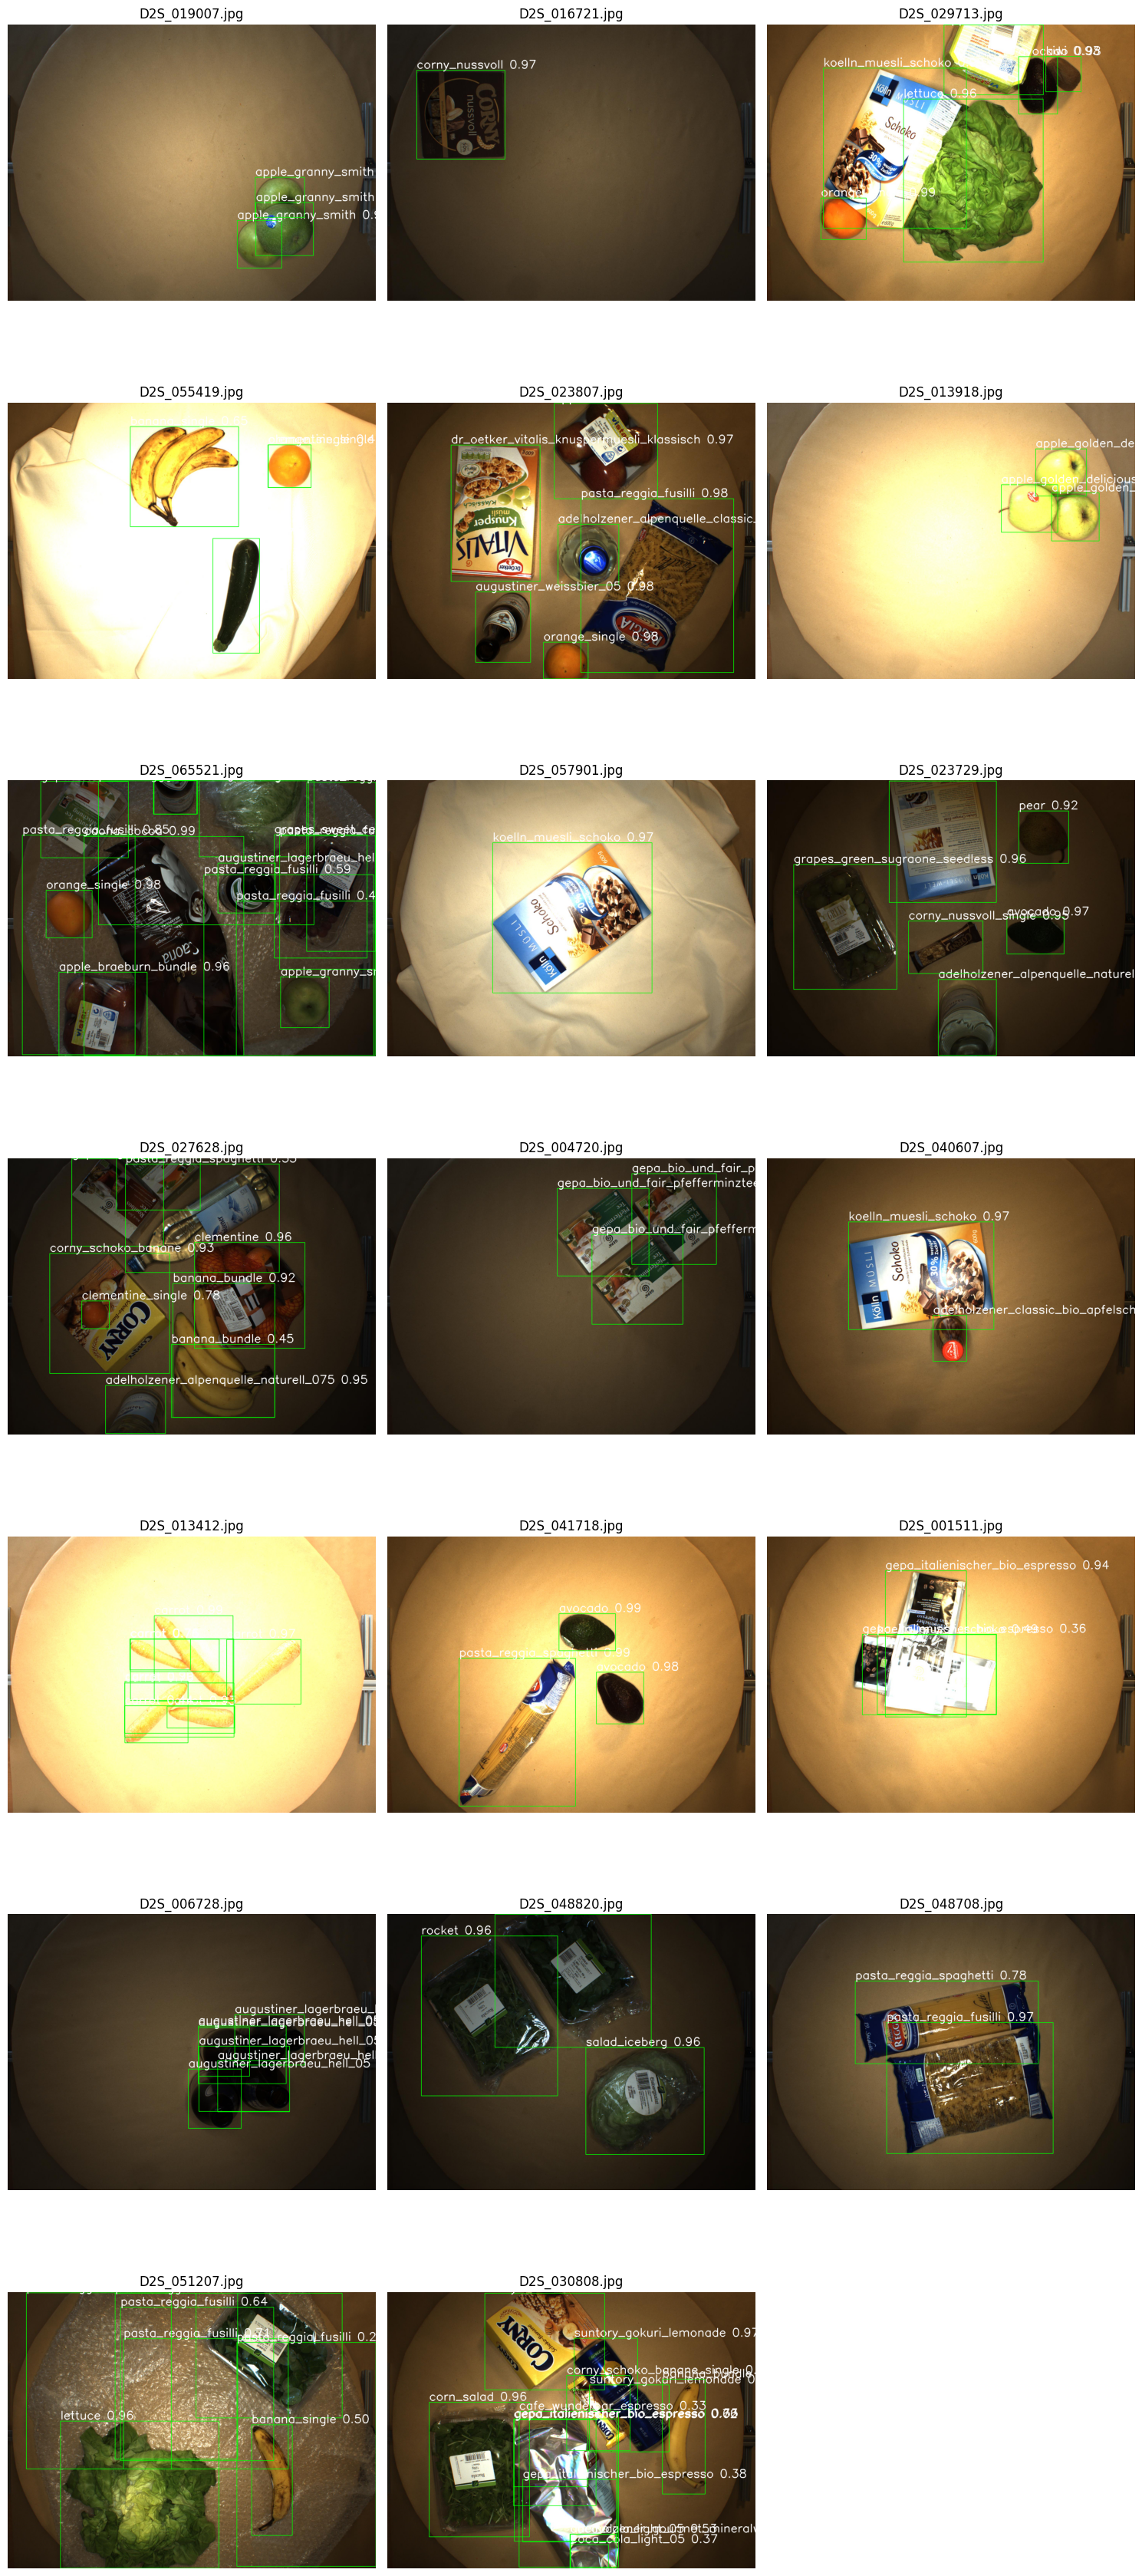

In [ ]:
from ultralytics import YOLO
import wandb
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import math


test_image_dir = Path("../../Dataset/images/test")
test_images = list(test_image_dir.glob("*.jpg"))[:20]  # Nur die ersten 20
print(len(test_images))
# 1. Login bei Weights & Biases (W&B)
wandb.login()

# 2. Initialisiere W&B Run (optional)
wandb.init(
    project="Yolo-Training",
    entity="maats",
    name="YOLO11n-COCO11-run1",
    config={  # alle Hyperparameter sauber abspeichern
        "epochs": 20,
        "imgsz": 400,
        "model": "yolo11n.pt",
        "dataset": "coco11.yaml",
    },
    sync_tensorboard=True,   # (Optional) falls du TensorBoard benutzt
)


# 3. YOLO-Modell laden (z.B. yolo11n)
model = YOLO("yolo11n.pt")

# 4. Trainiere das Modell
# 4. Trainiere das Modell
results = model.train(
    data="/data22/stu236894/GitRepos/TinyML-MT/code_imagegeneration/generated/dataset.yaml",
    epochs=20,
    imgsz=400,
    project="runs/train",
    name="yolo11n-exp1",
    verbose=True,
    # 🛠 WICHTIG:
    val=True,       # Validierung nach jedem Epoch aktivieren
    save=True,      # Modelle speichern
    save_period=1,  # (Optional) jedes Epoch speichern
    mode="wandb"    # ✅ AUTOMATISCH alle YOLO Metriken an W&B schicken!
)


# -------------------------------------------
# ✅ Nach dem Training: Inferenz auf Testbilder
# -------------------------------------------

# 📁 Testbilder-Verzeichnis

# 📦 Alternativ: Modell neu laden (falls gewünscht)
# Achtung: Pfad korrekt setzen!
# trained_model_path = "code_training/classification-code/runs/train/yolo11n-exp1/weights/best.pt"
# model = YOLO(trained_model_path)

# 🔍 Inferenz + Visualisierung der Testbilder
# 🔥 Grid-Plot aller Bilder
n_cols = 3  # Bilder pro Zeile
n_rows = math.ceil(len(test_images) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for idx, img_path in enumerate(test_images):
    results = model(img_path)

    img = cv2.imread(str(img_path))
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0])
            conf = box.conf[0]
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{model.names[cls]} {conf:.2f}"
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    row = idx // n_cols
    col = idx % n_cols
    axs[row, col].imshow(img_rgb)
    axs[row, col].axis('off')
    axs[row, col].set_title(img_path.name)

# Falls Plätze im Grid übrig sind → deaktivieren
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show(block=True) 

